### Business Problem and Domain Knowledge:
- **Business Problem:** 
    - The goal of this project is to predict whether a loan application will be approved or not based on various features such as age, income, marital status, credit history, and loan-related details.
    - The model will assist financial institutions in automating the loan approval process and help them make informed decisions based on applicant profiles.

- **Domain Knowledge:**
    - **Loan Approval Process:** Banks typically assess the applicant's financial stability, creditworthiness, and repayment capability when approving loans. 
    - **Features Considered:**
        - **Income**: A higher income generally indicates a higher ability to repay loans.
        - **Credit History**: A good credit history is essential for loan approval.
        - **Debt-to-Income Ratio**: A lower ratio indicates a lower risk for the bank.
        - **Credit Score**: A higher score generally correlates with better repayment history and a lower risk of default.
        


# Problem Statement:
- **Objective:** The goal of this analysis is to predict whether a loan application will be approved or rejected based on multiple features provided in the dataset.
- **Dataset:** The dataset consists of various features such as applicant's age, gender, employment type, income, marital status, loan amount, credit score, and debt-to-income ratio.
- **Target Variable:** The target variable for prediction is the `Loan Approval Status`, where `1` indicates loan approval and `0` indicates loan rejection.



In [1]:
# lib for extraction, manipulation, analysis
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for stats
import scipy.stats 
from scipy.stats import shapiro, chi2, normaltest, kstest, zscore

# train test split
from sklearn.model_selection import train_test_split

# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,multilabel_confusion_matrix

# pickle
import pickle

# handle the imbalance data
from imblearn.over_sampling import SMOTE

# handling the unnecessary warnings
import warnings

# Suppress only FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# Load the dataset and preview the first few rows
# The dataset contains various features related to loan applicants, and we will use these features to predict loan approval status.
df = pd.read_csv(r"C:\Users\UJWAL\OneDrive\Desktop\EDA NEW\Loan Approval Prediction (Finance)\loan_approval_data.csv")

# Display the first few rows to understand the structure of the dataset
df.head()


Age  Gender    Income Employment Type Marital Status  Loan Amount  \
0   59  Female  79410.03      Unemployed        Married    233663.73   
1   49  Female  98514.52   Self-Employed       Divorced    495836.26   
2   35  Female  85297.49      Unemployed        Married    485521.23   
3   63  Female  90181.88   Self-Employed       Divorced    471446.12   
4   28  Female  83226.47   Self-Employed       Divorced    393002.12   

   Loan Term  Interest Rate Credit History  Debt-to-Income Ratio  \
0        259          11.11           Good                  0.20   
1        258           5.12           Good                  0.35   
2        166          10.07           Good                  0.74   
3         45           5.63           Good                  0.79   
4        140           6.70           Poor                  0.21   

   Credit Score  Loan Approval Status  
0           424                     1  
1           366                     0  
2           305                     1  
3           613                     1  
4           625                     0

In [3]:
# Check the shape of the dataset to understand the number of rows and columns
df.shape

(1031, 12)

In [4]:
# Check the total number of elements in the dataset
# This will provide an overview of the number of values present in the entire dataset
df.size

12372

In [5]:
# Display basic information about the dataset
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1031 non-null   int64  
 1   Gender                1031 non-null   object 
 2   Income                1031 non-null   float64
 3   Employment Type       1031 non-null   object 
 4   Marital Status        1031 non-null   object 
 5   Loan Amount           1031 non-null   float64
 6   Loan Term             1031 non-null   int64  
 7   Interest Rate         1031 non-null   float64
 8   Credit History        1031 non-null   object 
 9   Debt-to-Income Ratio  1031 non-null   float64
 10  Credit Score          1031 non-null   int64  
 11  Loan Approval Status  1031 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 96.8+ KB


In [6]:
# Check for missing values in the dataset
# This step helps identify columns with missing data, which may require imputation or removal.
df.isnull().sum()
# checking and handling of missing values
def handle_missing_values(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype in ['int64', 'float64']:
                df[col].fillna(df[col].mean(), inplace=True)
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)
    return df

# Handling missing values from entire df
df = handle_missing_values(df)
df.isnull().sum()

Age                     0
Gender                  0
Income                  0
Employment Type         0
Marital Status          0
Loan Amount             0
Loan Term               0
Interest Rate           0
Credit History          0
Debt-to-Income Ratio    0
Credit Score            0
Loan Approval Status    0
dtype: int64

In [7]:
# Descriptive statistics of numerical columns
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


Age         Income    Loan Amount    Loan Term  Interest Rate  \
count  1031.000000    1031.000000    1031.000000  1031.000000    1031.000000   
mean     42.537342   85204.841086  255858.755829   188.058196       9.123715   
std      12.635914   36899.913114  144750.799281   101.292514       3.286359   
min      21.000000   20030.880000    5093.260000    12.000000       3.500000   
25%      31.500000   53027.355000  126946.930000    99.500000       6.245000   
50%      43.000000   86819.460000  265090.280000   188.000000       9.090000   
75%      53.000000  116982.875000  380482.595000   279.000000      11.905000   
max      64.000000  149915.950000  499858.330000   359.000000      14.990000   

       Debt-to-Income Ratio  Credit Score  Loan Approval Status  
count           1031.000000   1031.000000           1031.000000  
mean               0.495926    572.645005              0.541222  
std                0.231326    157.373380              0.498540  
min                0.100000    300.000000              0.000000  
25%                0.300000    434.000000              0.000000  
50%                0.480000    574.000000              1.000000  
75%                0.690000    702.000000              1.000000  
max                0.900000    849.000000              1.000000

In [8]:
# Check unique values in categorical columns
categorical_columns = ["Gender", "Employment Type", "Marital Status", "Credit History", "Loan Approval Status"]
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Unique values in Gender:
Gender
Male      532
Female    499
Name: count, dtype: int64

Unique values in Employment Type:
Employment Type
Unemployed       359
Self-Employed    340
Salaried         332
Name: count, dtype: int64

Unique values in Marital Status:
Marital Status
Married     356
Single      350
Divorced    325
Name: count, dtype: int64

Unique values in Credit History:
Credit History
Good    370
Poor    337
Fair    324
Name: count, dtype: int64

Unique values in Loan Approval Status:
Loan Approval Status
1    558
0    473
Name: count, dtype: int64


Column: Age
Mean: 42.537342386032975
Median: 43.0
Mode: 53
Skewness: -0.07998072738773578
Variance: 159.66632263896867


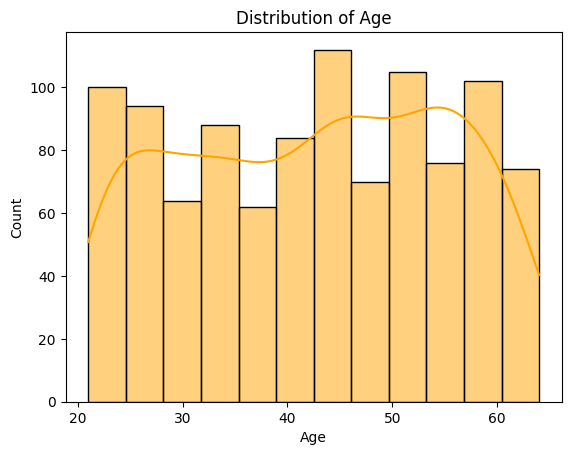

Column: Income
Mean: 85204.84108632397
Median: 86819.46
Mode: 20030.88
Skewness: -0.0317091502534209
Variance: 1361603587.7853801


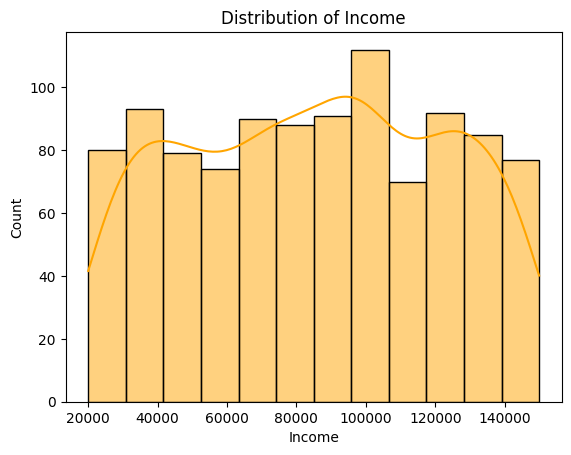

Column: Loan Amount
Mean: 255858.75582929194
Median: 265090.28
Mode: 5093.26
Skewness: -0.06513563418502219
Variance: 20952793892.545204


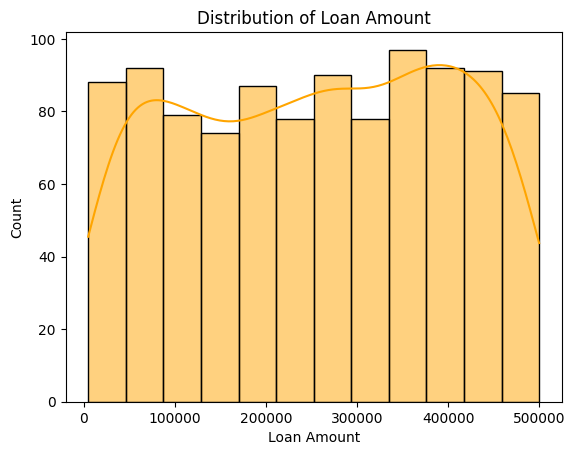

Column: Loan Term
Mean: 188.05819592628515
Median: 188.0
Mode: 218
Skewness: 0.02162128051945403
Variance: 10260.173308975167


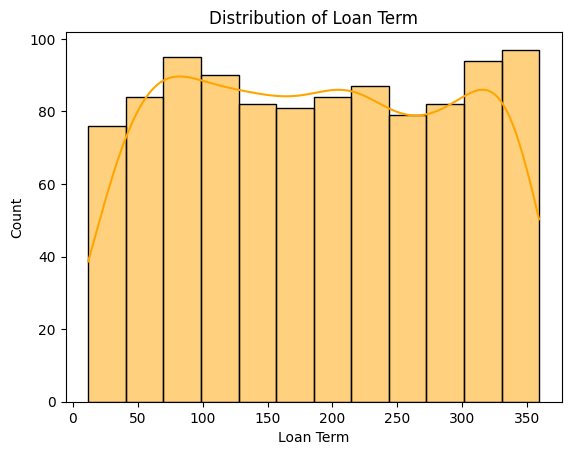

Column: Interest Rate
Mean: 9.123714839961202
Median: 9.09
Mode: 4.08
Skewness: 0.04169596497986853
Variance: 10.800152885595095


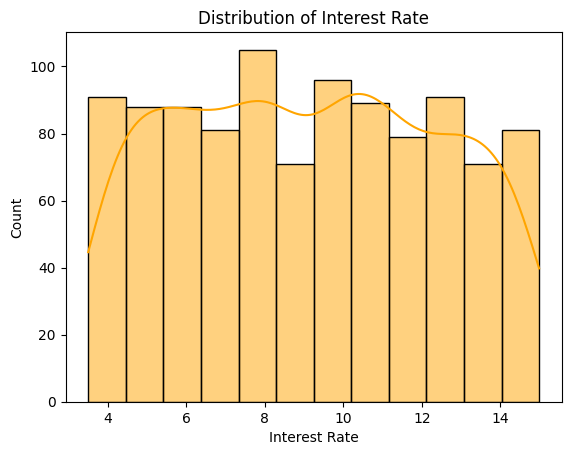

Column: Debt-to-Income Ratio
Mean: 0.4959262851600388
Median: 0.48
Mode: 0.37
Skewness: 0.05373723417604884
Variance: 0.05351173825016714


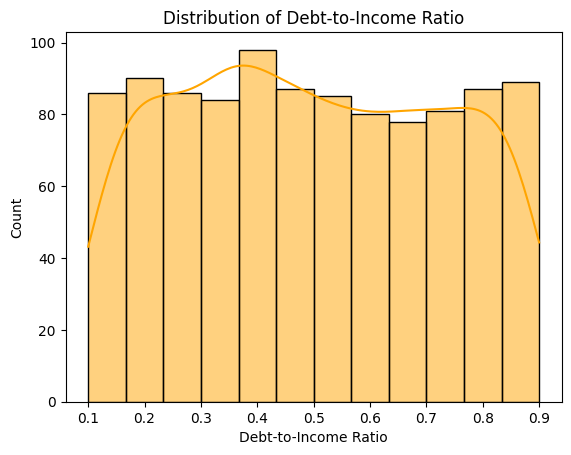

Column: Credit Score
Mean: 572.6450048496605
Median: 574.0
Mode: 378
Skewness: 0.027632880622663114
Variance: 24766.380652208714


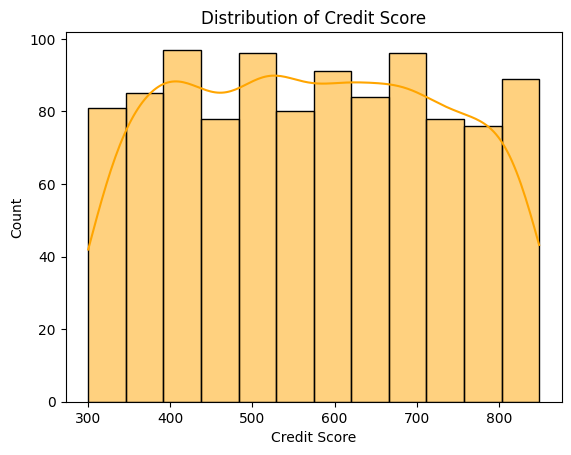

Column: Loan Approval Status
Mean: 0.5412221144519883
Median: 1.0
Mode: 1
Skewness: -0.16569287213526698
Variance: 0.24854180595707817


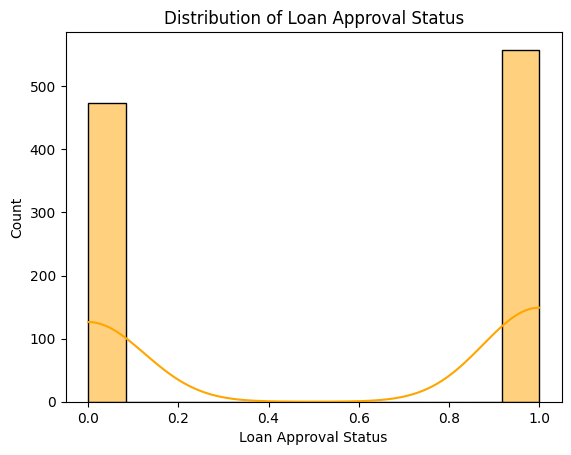

In [9]:
# Visualize the distribution of numerical features or detect outliers using boxplots/histograms
# This is critical for understanding the data and identifying potential preprocessing steps.
# univariate analysis of numerical columns
def numerical_analysis(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        print(f'Column: {col}')
        print(f'Mean: {df[col].mean()}')
        print(f'Median: {df[col].median()}')
        print(f'Mode: {df[col].mode()[0]}')
        print(f'Skewness: {df[col].skew()}')
        print(f'Variance: {df[col].var()}')
        sns.histplot(df[col], kde=True, color='orange')
        plt.title(f'Distribution of {col}')
        plt.show()

numerical_analysis(df)

Column: Gender
Number of unique values: 2
Unique values: ['Female' 'Male']
Value counts:
Gender
Male      532
Female    499
Name: count, dtype: int64


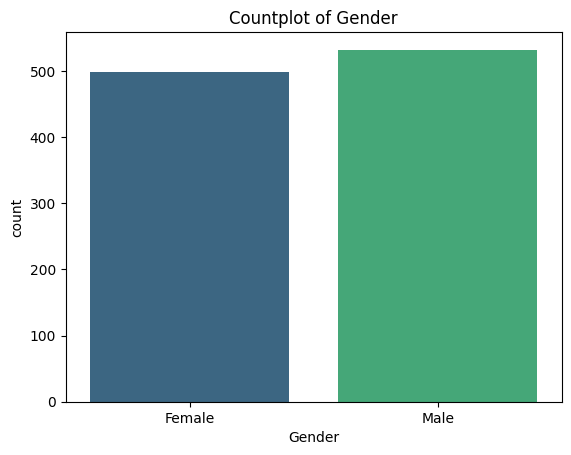

Column: Employment Type
Number of unique values: 3
Unique values: ['Unemployed' 'Self-Employed' 'Salaried']
Value counts:
Employment Type
Unemployed       359
Self-Employed    340
Salaried         332
Name: count, dtype: int64


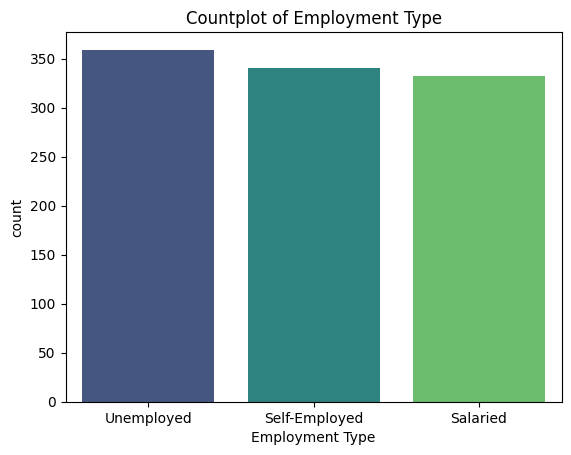

Column: Marital Status
Number of unique values: 3
Unique values: ['Married' 'Divorced' 'Single']
Value counts:
Marital Status
Married     356
Single      350
Divorced    325
Name: count, dtype: int64


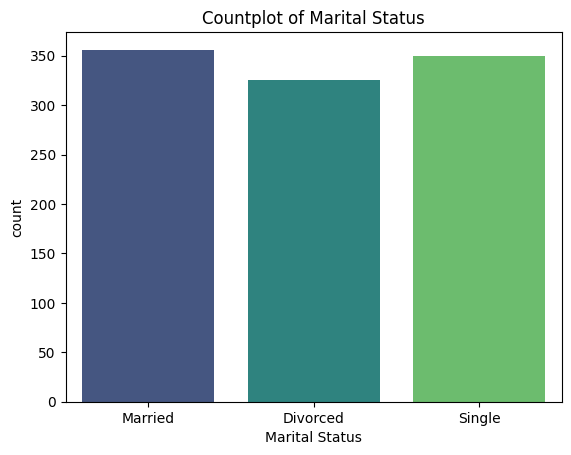

Column: Credit History
Number of unique values: 3
Unique values: ['Good' 'Poor' 'Fair']
Value counts:
Credit History
Good    370
Poor    337
Fair    324
Name: count, dtype: int64


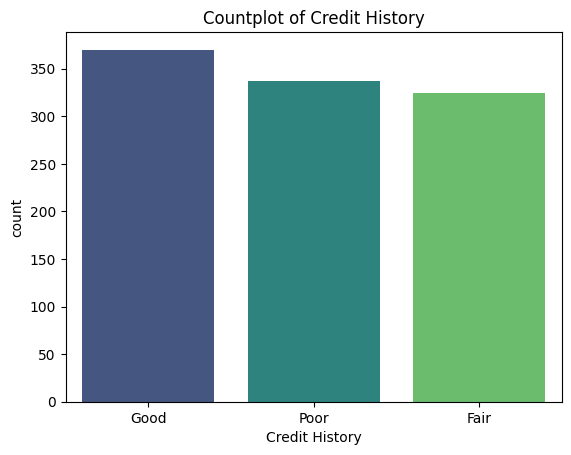

In [10]:
# analysis of categorical columns
def categorical_analysis(df):
    for col in df.select_dtypes(include=['object', 'category']).columns:
        print(f'Column: {col}')
        print(f'Number of unique values: {df[col].nunique()}')
        print(f'Unique values: {df[col].unique()}')
        print(f'Value counts:\n{df[col].value_counts()}')
        sns.countplot(x=col, data=df, palette='viridis')
        plt.title(f'Countplot of {col}')
        plt.show()

categorical_analysis(df)

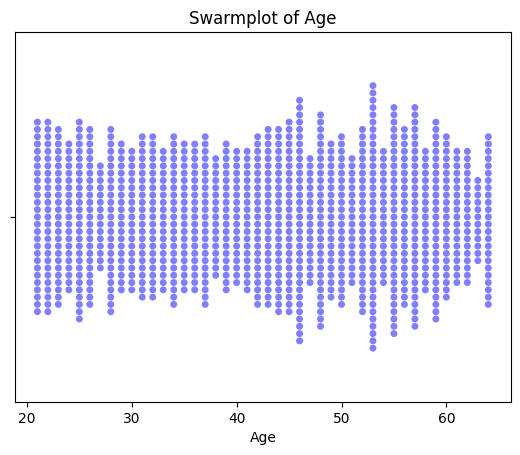

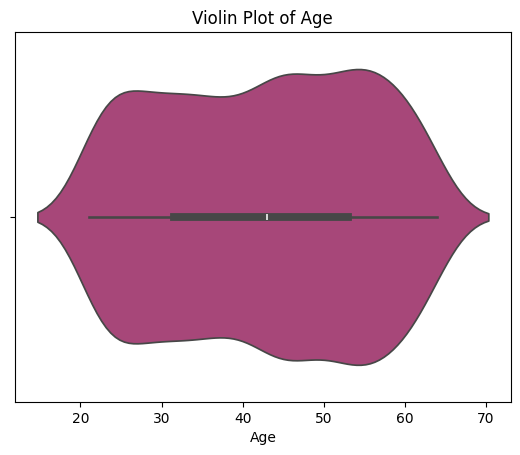

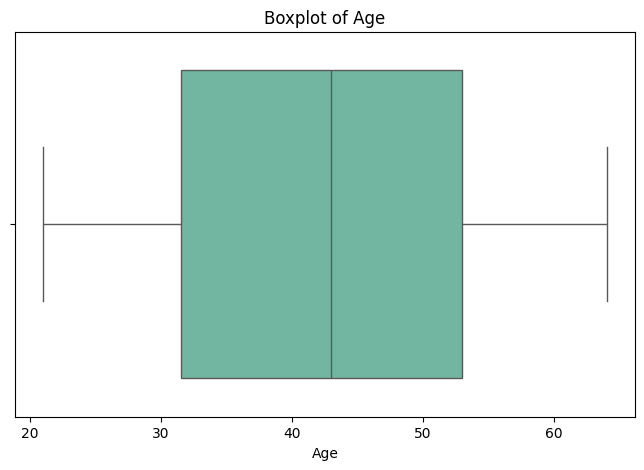

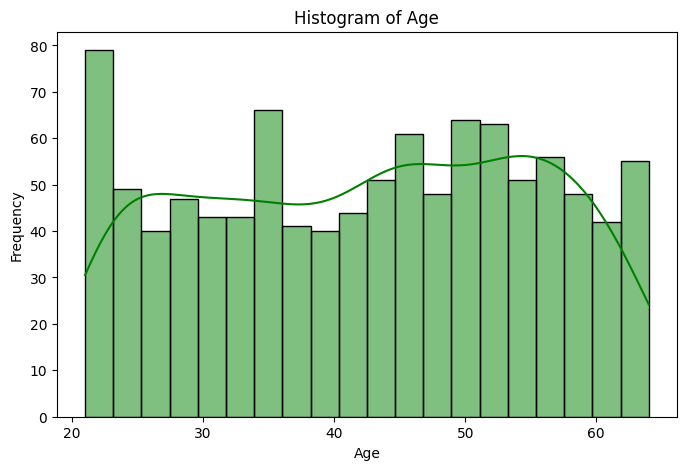

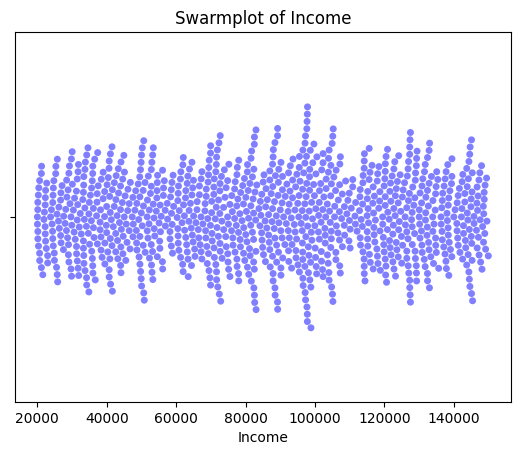

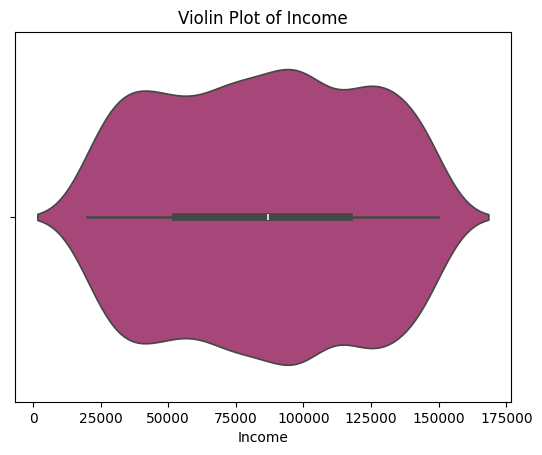

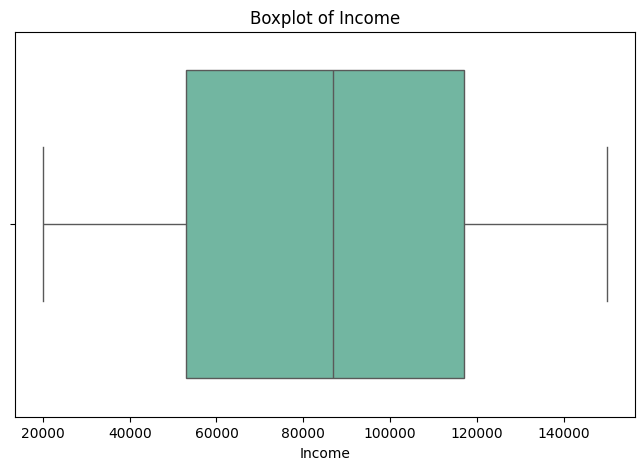

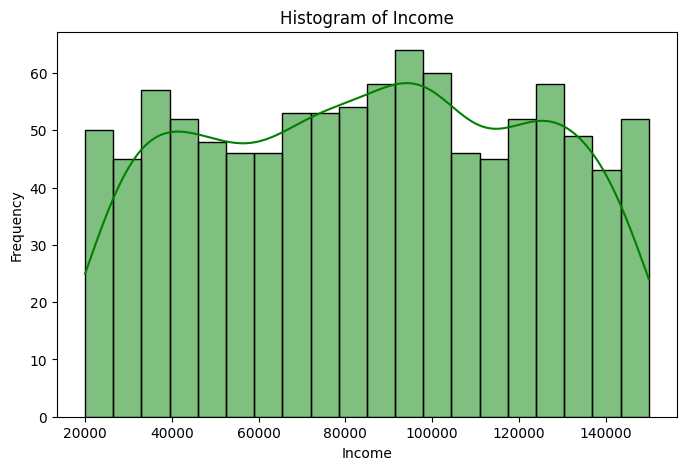

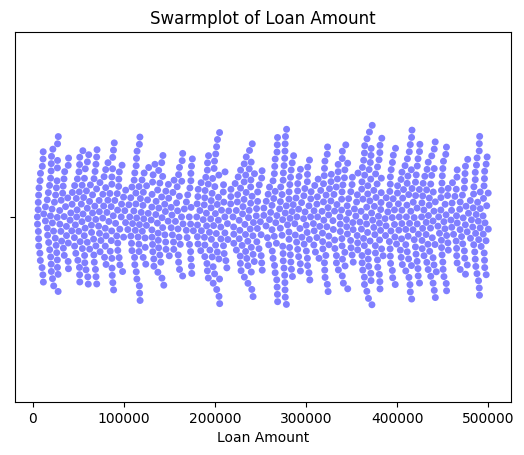

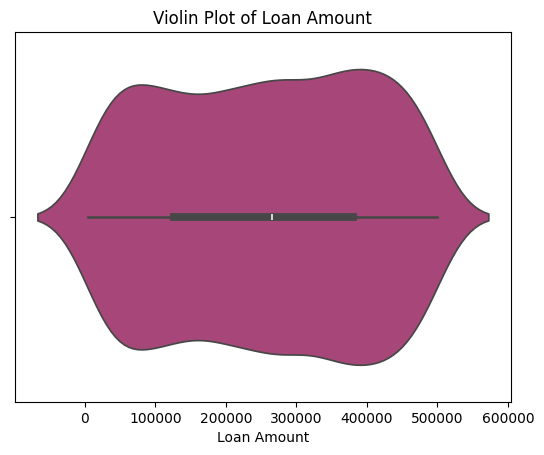

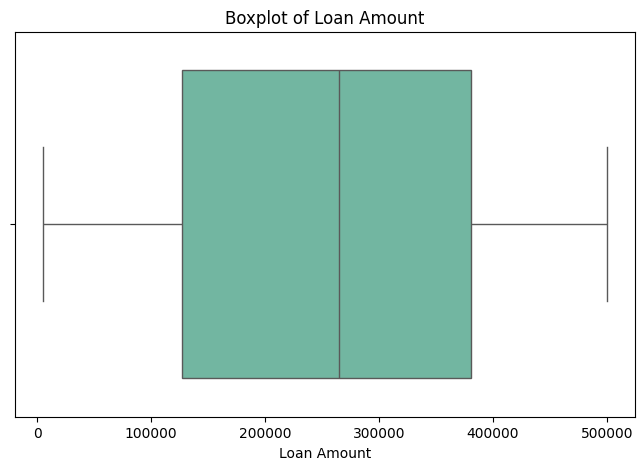

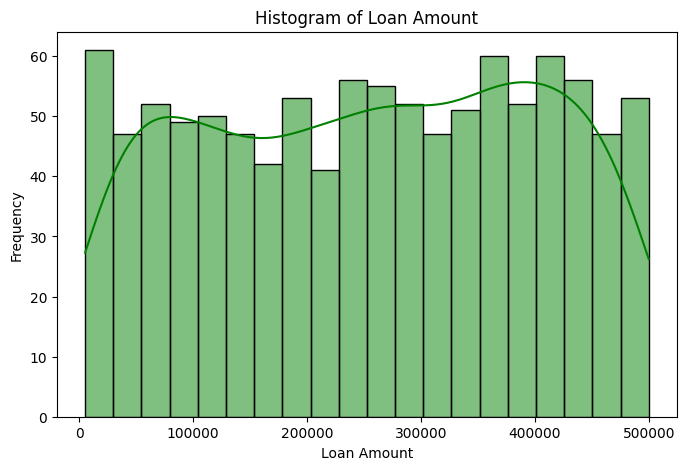

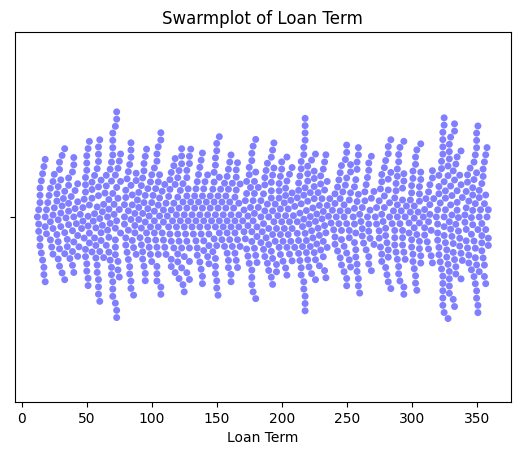

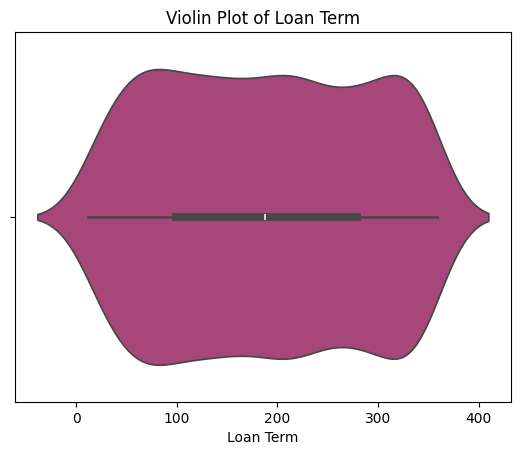

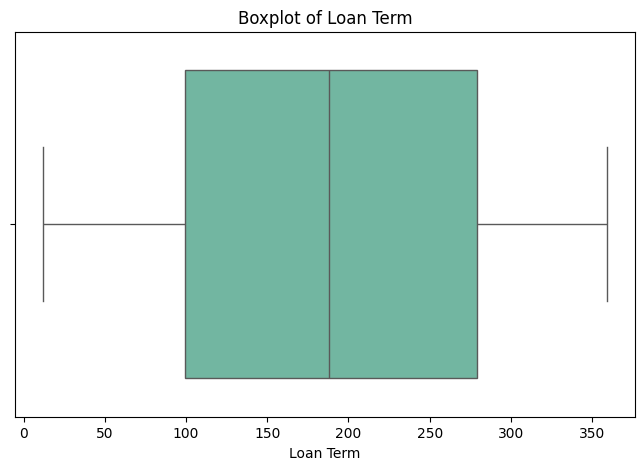

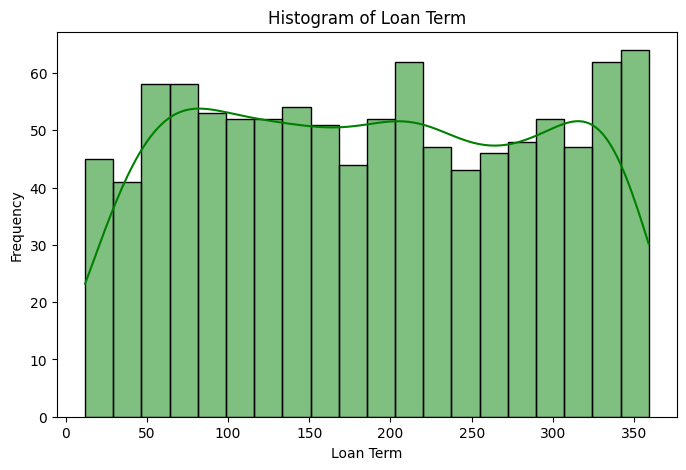

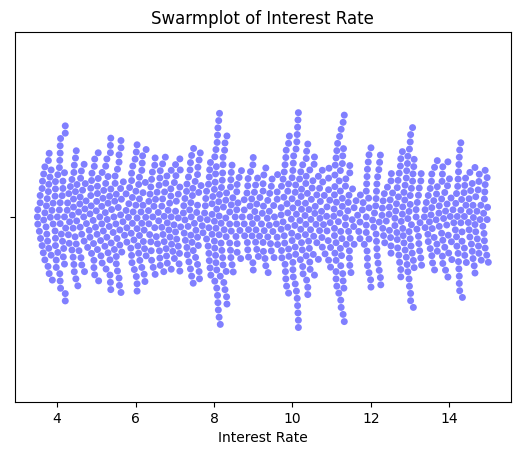

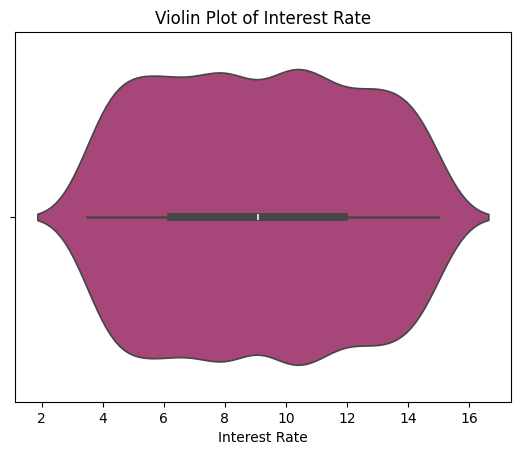

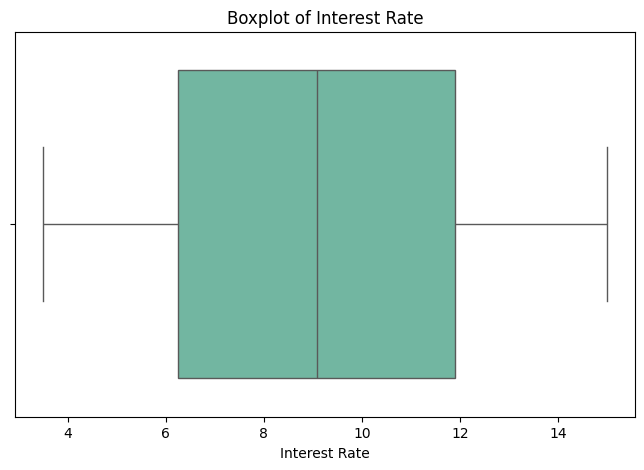

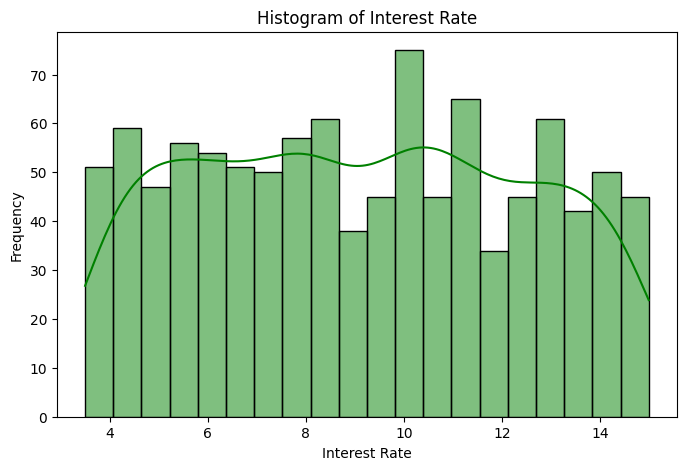

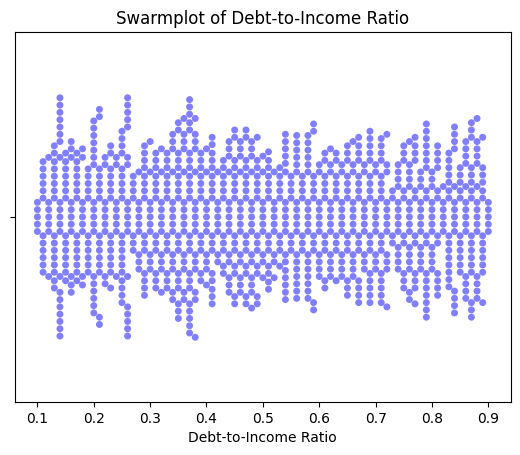

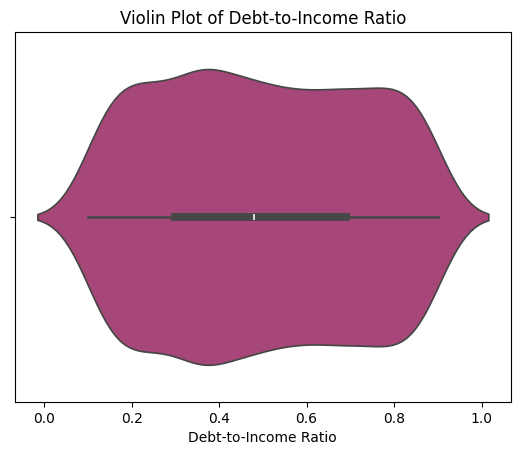

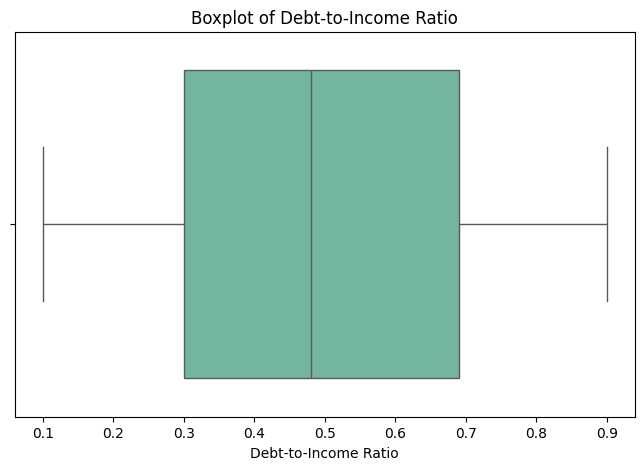

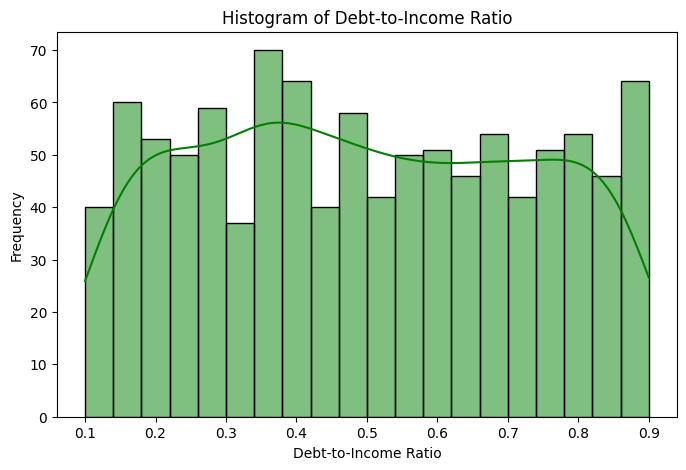

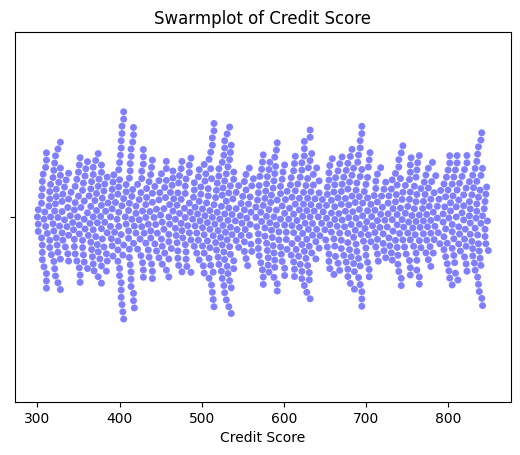

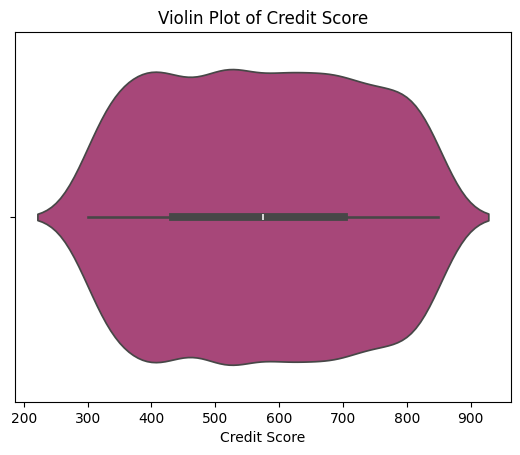

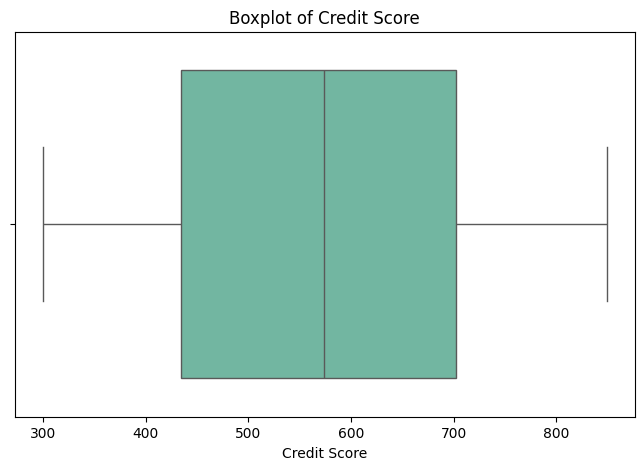

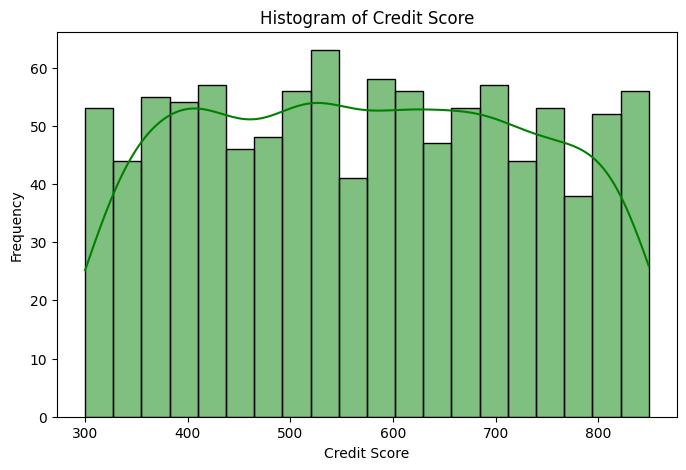

C:\Users\UJWAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 28.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\UJWAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 92.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


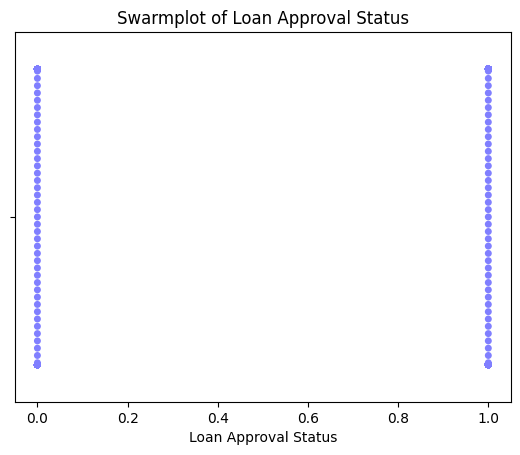

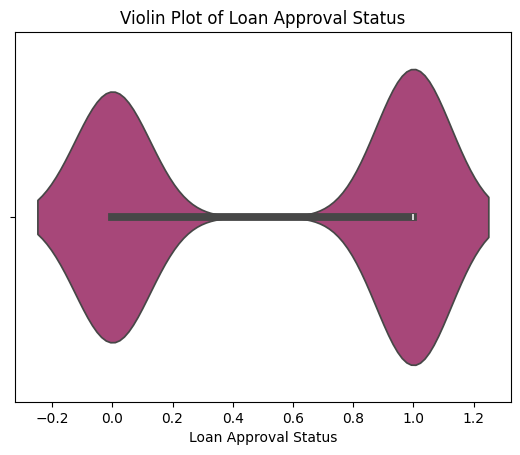

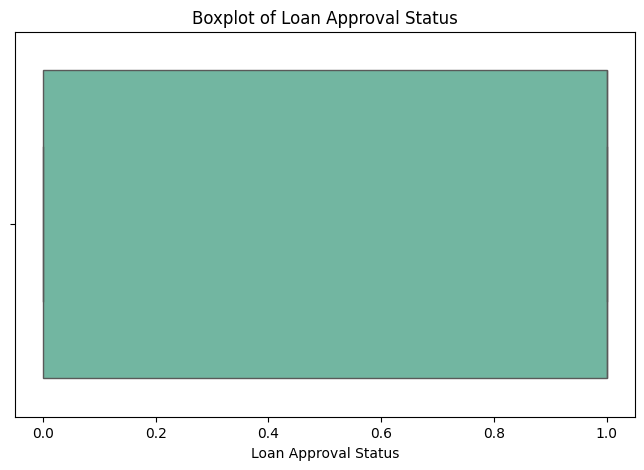

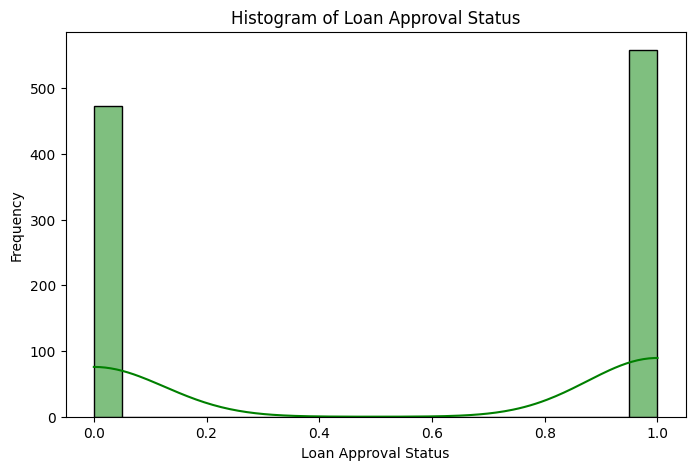

In [11]:

# Visualize the distribution of numerical features or detect outliers using boxplots/histograms
# This is critical for understanding the data and identifying potential preprocessing steps.
# data visualization of numerical columns
def visualize_numerical_columns(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        sns.swarmplot(x=df[col], palette='cool')
        plt.title(f'Swarmplot of {col}')
        plt.show()

        sns.violinplot(x=df[col], palette='magma')
        plt.title(f'Violin Plot of {col}')
        plt.show()
        
        # Boxplot
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[col], palette='Set2')
        plt.title(f'Boxplot of {col}')
        plt.show()

        # Histogram
        plt.figure(figsize=(8, 5))
        sns.histplot(df[col], kde=True, bins=20, color='green')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

visualize_numerical_columns(df)

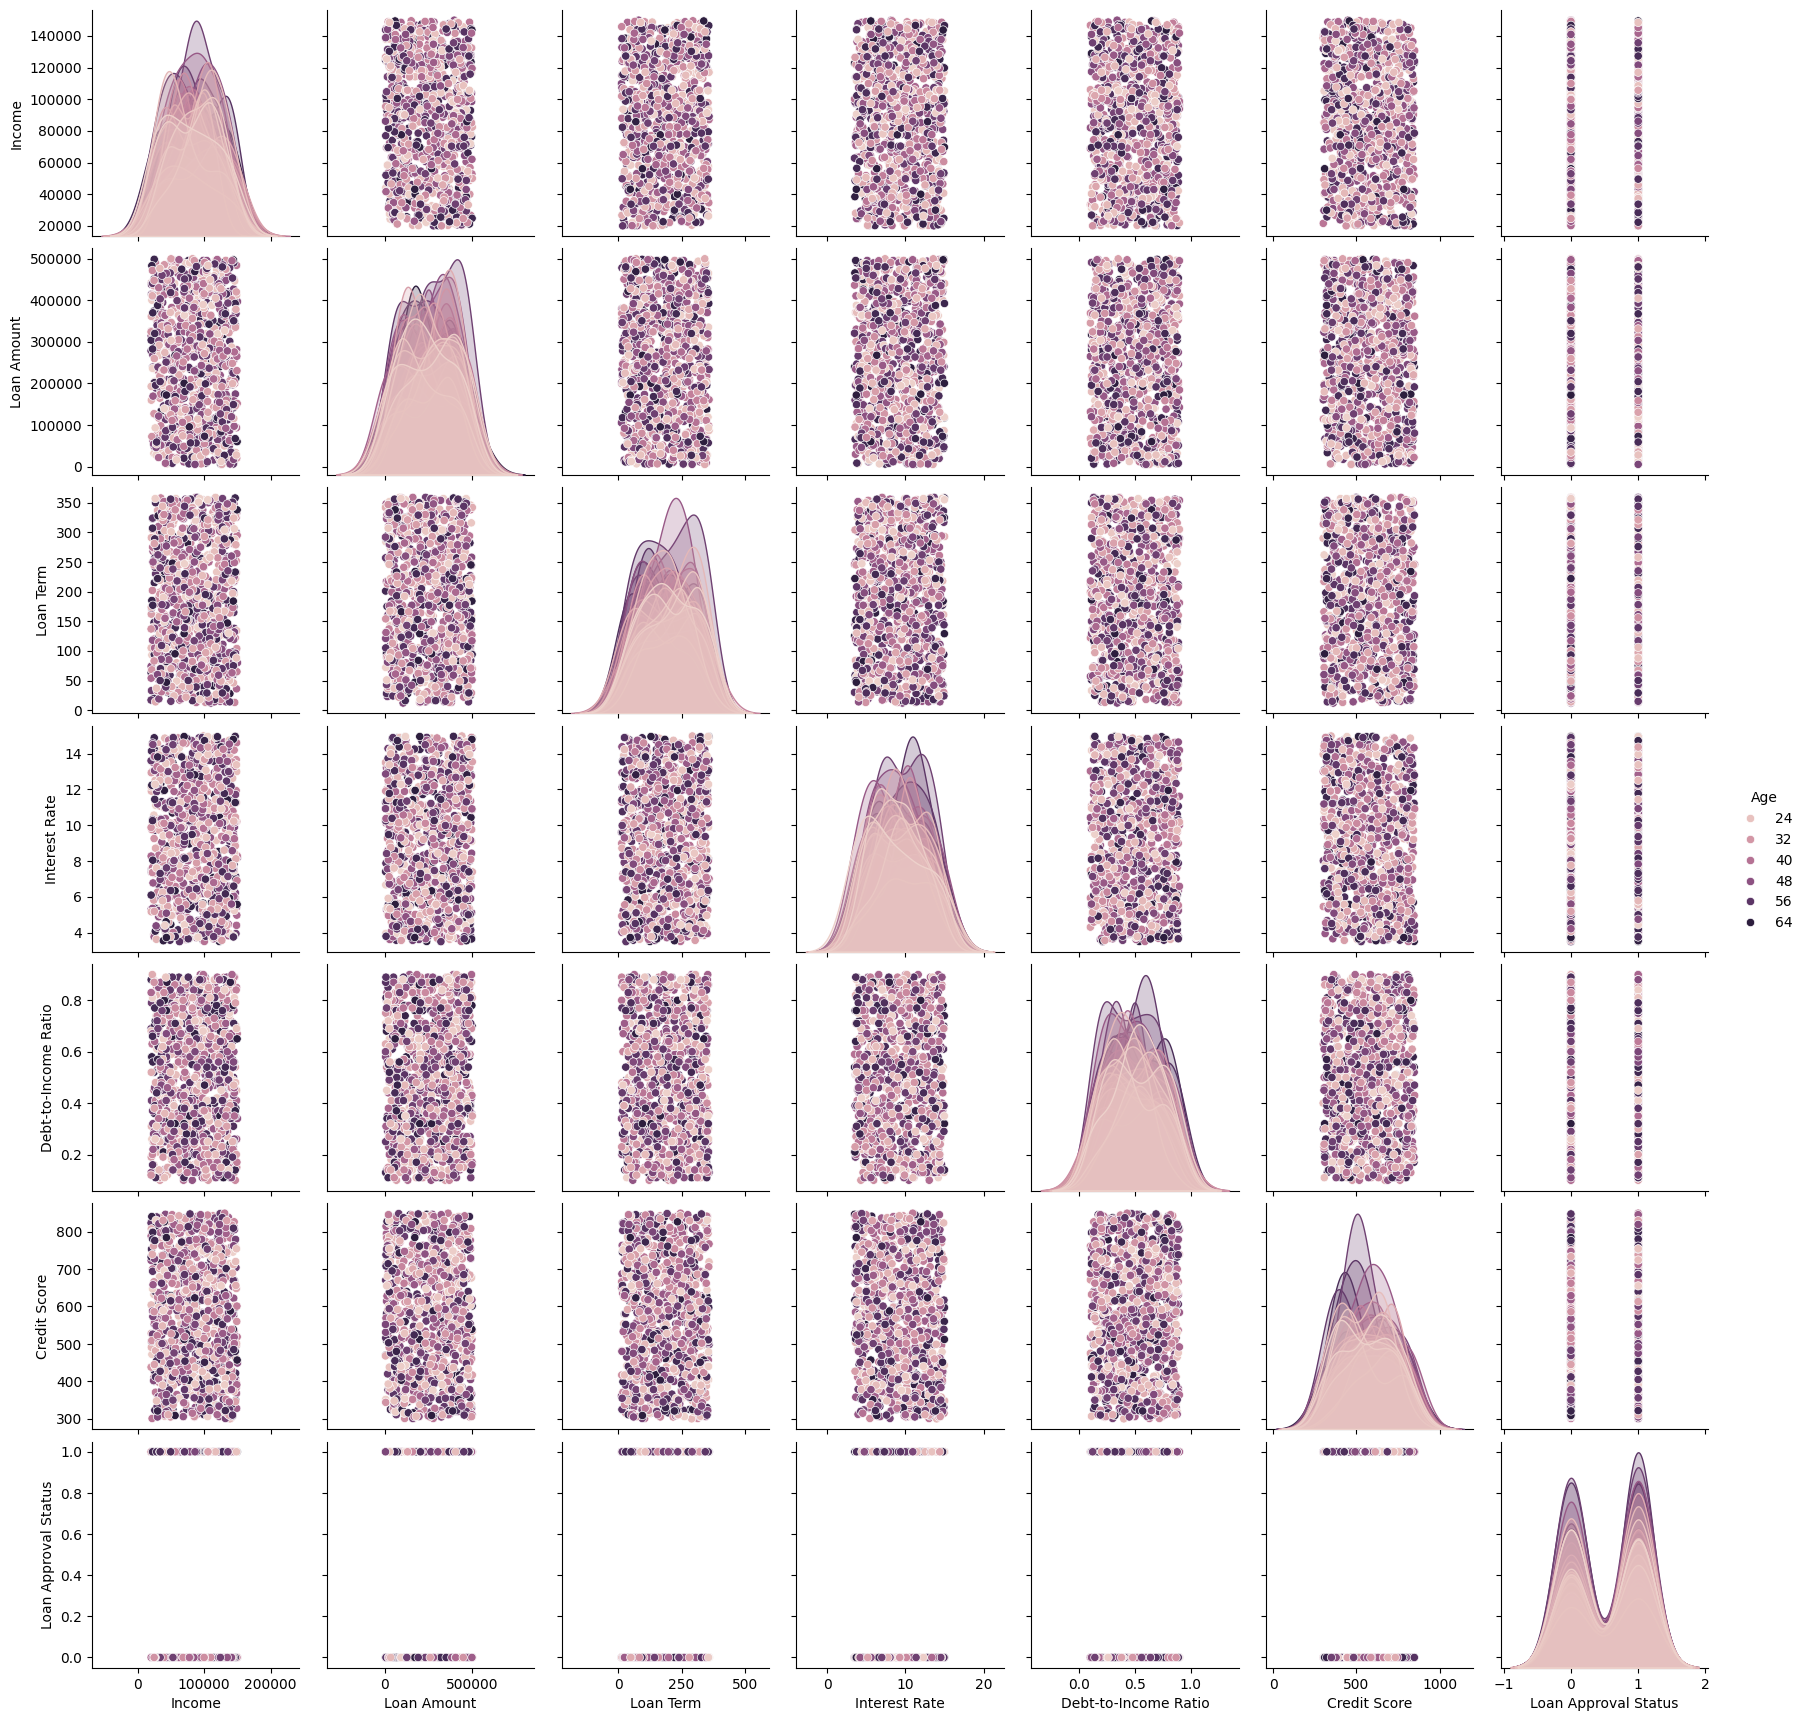

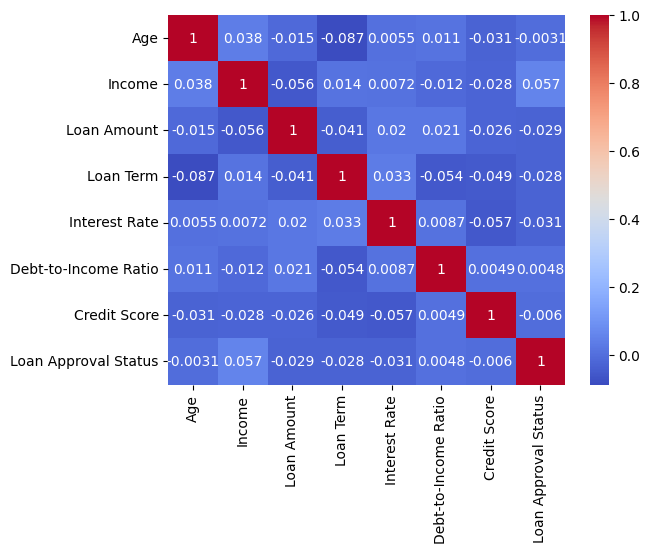

Covariance between Loan Amount and Loan Term: -603978.6653007352
Correlation between Loan Amount and Loan Term: -0.04119298646998589


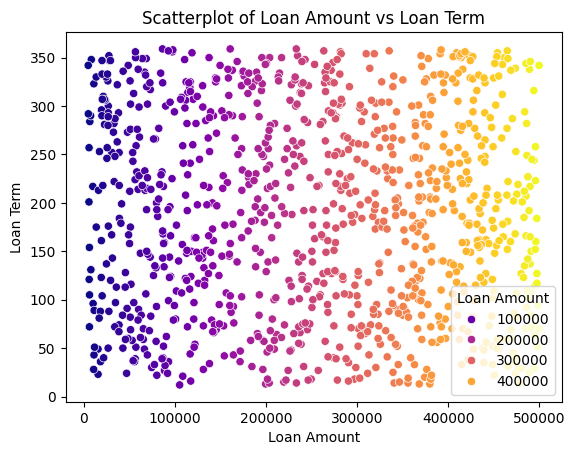

In [12]:
# Function for bivariate analysis
def bivariate_analysis(df, col1, col2):
    print(f'Covariance between {col1} and {col2}:', df[[col1, col2]].cov().iloc[0, 1])
    print(f'Correlation between {col1} and {col2}:', df[[col1, col2]].corr().iloc[0, 1])
    sns.scatterplot(x=col1, y=col2, data=df, hue=df[col1], palette='plasma')
    plt.title(f'Scatterplot of {col1} vs {col2}')
    plt.show()

# Pairplot for entire dataset and correlation heatmap
sns.pairplot(df, hue=df.columns[0])
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

# bivariate_analysis
bivariate_analysis(df, 'Loan Amount', 'Loan Term')

In [13]:

# Visualize the distribution of numerical features or detect outliers using boxplots/histograms
# This is critical for understanding the data and identifying potential preprocessing steps.
# checking and handling of outliers

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

def Checking_and_Handling_Of_Outliers(df, col):
    
    # List of possible colors
    colors = ["Red", "Blue", "Green", "Purple", "Orange", "Pink", "Yellow", "Cyan"]
    
    # Randomly select a color from the list
    box_color = random.choice(colors)
    
    # Boxplot with dynamic color
    plt.figure(figsize=(4, 2))
    sns.boxplot(df[col], color=box_color)
    plt.title(f"Boxplot for {col}")
    plt.show()
    
    # Calculating the IQR and tails
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    LowerTail = q1 - 1.5 * iqr
    UpperTail = q3 + 1.5 * iqr

    print(f"25% Quantile q1 = {q1}\n75% Quantile q3 = {q3}\nIQR = {iqr}\n")
    print("-" * 80)
    print(f"Lower Tail = {LowerTail}\nUpper Tail = {UpperTail}")
    print("-" * 80)

    # Checking for Outliers
    Outliers = df[(df[col] < LowerTail) | (df[col] > UpperTail)]
    print("\nOutliers:\n", Outliers)
    print("-" * 80)

    # Handling of Outliers:
    # Convert column to float type before assigning float values
    df[col] = df[col].astype(float)

    df.loc[df[col] < LowerTail, col] = LowerTail  # Assign LowerTail to values less than it
    df.loc[df[col] > UpperTail, col] = UpperTail  # Assign UpperTail to values greater than it

    print("After handling of Outliers data:\n")
    print(df.head())




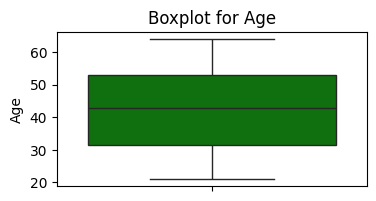

25% Quantile q1 = 31.5
75% Quantile q3 = 53.0
IQR = 21.5

--------------------------------------------------------------------------------
Lower Tail = -0.75
Upper Tail = 85.25
--------------------------------------------------------------------------------

Outliers:
 Empty DataFrame
Columns: [Age, Gender, Income, Employment Type, Marital Status, Loan Amount, Loan Term, Interest Rate, Credit History, Debt-to-Income Ratio, Credit Score, Loan Approval Status]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

    Age  Gender    Income Employment Type Marital Status  Loan Amount  \
0  59.0  Female  79410.03      Unemployed        Married    233663.73   
1  49.0  Female  98514.52   Self-Employed       Divorced    495836.26   
2  35.0  Female  85297.49      Unemployed        Married    485521.23   
3  63.0  Female  90181.88   Self-Employed       Divorced    471446.12   
4  28.0  Female  83226.47   Self-Employed      

In [14]:
Checking_and_Handling_Of_Outliers(df,'Age')

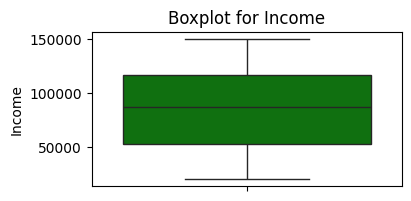

25% Quantile q1 = 53027.354999999996
75% Quantile q3 = 116982.875
IQR = 63955.520000000004

--------------------------------------------------------------------------------
Lower Tail = -42905.925
Upper Tail = 212916.155
--------------------------------------------------------------------------------

Outliers:
 Empty DataFrame
Columns: [Age, Gender, Income, Employment Type, Marital Status, Loan Amount, Loan Term, Interest Rate, Credit History, Debt-to-Income Ratio, Credit Score, Loan Approval Status]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

    Age  Gender    Income Employment Type Marital Status  Loan Amount  \
0  59.0  Female  79410.03      Unemployed        Married    233663.73   
1  49.0  Female  98514.52   Self-Employed       Divorced    495836.26   
2  35.0  Female  85297.49      Unemployed        Married    485521.23   
3  63.0  Female  90181.88   Self-Employed       Divorced    471446.12   
4  

In [15]:
Checking_and_Handling_Of_Outliers(df,'Income')

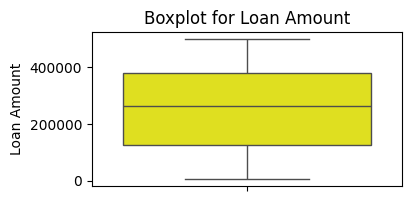

25% Quantile q1 = 126946.93
75% Quantile q3 = 380482.595
IQR = 253535.66499999998

--------------------------------------------------------------------------------
Lower Tail = -253356.56749999995
Upper Tail = 760786.0924999999
--------------------------------------------------------------------------------

Outliers:
 Empty DataFrame
Columns: [Age, Gender, Income, Employment Type, Marital Status, Loan Amount, Loan Term, Interest Rate, Credit History, Debt-to-Income Ratio, Credit Score, Loan Approval Status]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

    Age  Gender    Income Employment Type Marital Status  Loan Amount  \
0  59.0  Female  79410.03      Unemployed        Married    233663.73   
1  49.0  Female  98514.52   Self-Employed       Divorced    495836.26   
2  35.0  Female  85297.49      Unemployed        Married    485521.23   
3  63.0  Female  90181.88   Self-Employed       Divorced    471446.12

In [16]:
Checking_and_Handling_Of_Outliers(df,'Loan Amount')

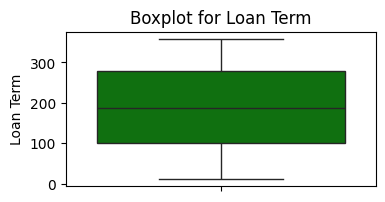

25% Quantile q1 = 99.5
75% Quantile q3 = 279.0
IQR = 179.5

--------------------------------------------------------------------------------
Lower Tail = -169.75
Upper Tail = 548.25
--------------------------------------------------------------------------------

Outliers:
 Empty DataFrame
Columns: [Age, Gender, Income, Employment Type, Marital Status, Loan Amount, Loan Term, Interest Rate, Credit History, Debt-to-Income Ratio, Credit Score, Loan Approval Status]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

    Age  Gender    Income Employment Type Marital Status  Loan Amount  \
0  59.0  Female  79410.03      Unemployed        Married    233663.73   
1  49.0  Female  98514.52   Self-Employed       Divorced    495836.26   
2  35.0  Female  85297.49      Unemployed        Married    485521.23   
3  63.0  Female  90181.88   Self-Employed       Divorced    471446.12   
4  28.0  Female  83226.47   Self-Employed 

In [17]:
Checking_and_Handling_Of_Outliers(df,'Loan Term')

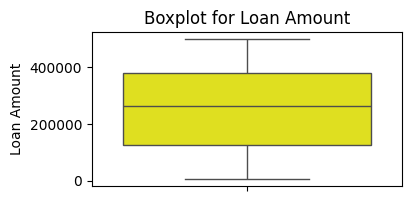

25% Quantile q1 = 126946.93
75% Quantile q3 = 380482.595
IQR = 253535.66499999998

--------------------------------------------------------------------------------
Lower Tail = -253356.56749999995
Upper Tail = 760786.0924999999
--------------------------------------------------------------------------------

Outliers:
 Empty DataFrame
Columns: [Age, Gender, Income, Employment Type, Marital Status, Loan Amount, Loan Term, Interest Rate, Credit History, Debt-to-Income Ratio, Credit Score, Loan Approval Status]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

    Age  Gender    Income Employment Type Marital Status  Loan Amount  \
0  59.0  Female  79410.03      Unemployed        Married    233663.73   
1  49.0  Female  98514.52   Self-Employed       Divorced    495836.26   
2  35.0  Female  85297.49      Unemployed        Married    485521.23   
3  63.0  Female  90181.88   Self-Employed       Divorced    471446.12

In [18]:
Checking_and_Handling_Of_Outliers(df,'Loan Amount')

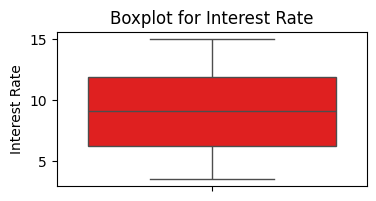

25% Quantile q1 = 6.245
75% Quantile q3 = 11.905000000000001
IQR = 5.660000000000001

--------------------------------------------------------------------------------
Lower Tail = -2.245000000000002
Upper Tail = 20.395000000000003
--------------------------------------------------------------------------------

Outliers:
 Empty DataFrame
Columns: [Age, Gender, Income, Employment Type, Marital Status, Loan Amount, Loan Term, Interest Rate, Credit History, Debt-to-Income Ratio, Credit Score, Loan Approval Status]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

    Age  Gender    Income Employment Type Marital Status  Loan Amount  \
0  59.0  Female  79410.03      Unemployed        Married    233663.73   
1  49.0  Female  98514.52   Self-Employed       Divorced    495836.26   
2  35.0  Female  85297.49      Unemployed        Married    485521.23   
3  63.0  Female  90181.88   Self-Employed       Divorced    471446

In [19]:
Checking_and_Handling_Of_Outliers(df,'Interest Rate')

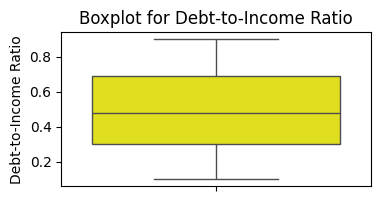

25% Quantile q1 = 0.3
75% Quantile q3 = 0.69
IQR = 0.38999999999999996

--------------------------------------------------------------------------------
Lower Tail = -0.285
Upper Tail = 1.275
--------------------------------------------------------------------------------

Outliers:
 Empty DataFrame
Columns: [Age, Gender, Income, Employment Type, Marital Status, Loan Amount, Loan Term, Interest Rate, Credit History, Debt-to-Income Ratio, Credit Score, Loan Approval Status]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

    Age  Gender    Income Employment Type Marital Status  Loan Amount  \
0  59.0  Female  79410.03      Unemployed        Married    233663.73   
1  49.0  Female  98514.52   Self-Employed       Divorced    495836.26   
2  35.0  Female  85297.49      Unemployed        Married    485521.23   
3  63.0  Female  90181.88   Self-Employed       Divorced    471446.12   
4  28.0  Female  83226.47   Self

In [20]:
Checking_and_Handling_Of_Outliers(df,'Debt-to-Income Ratio')

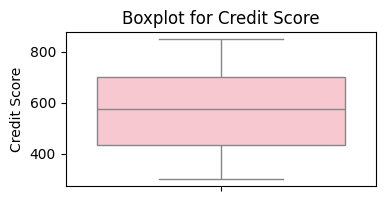

25% Quantile q1 = 434.0
75% Quantile q3 = 702.0
IQR = 268.0

--------------------------------------------------------------------------------
Lower Tail = 32.0
Upper Tail = 1104.0
--------------------------------------------------------------------------------

Outliers:
 Empty DataFrame
Columns: [Age, Gender, Income, Employment Type, Marital Status, Loan Amount, Loan Term, Interest Rate, Credit History, Debt-to-Income Ratio, Credit Score, Loan Approval Status]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

    Age  Gender    Income Employment Type Marital Status  Loan Amount  \
0  59.0  Female  79410.03      Unemployed        Married    233663.73   
1  49.0  Female  98514.52   Self-Employed       Divorced    495836.26   
2  35.0  Female  85297.49      Unemployed        Married    485521.23   
3  63.0  Female  90181.88   Self-Employed       Divorced    471446.12   
4  28.0  Female  83226.47   Self-Employed   

In [21]:
Checking_and_Handling_Of_Outliers(df,'Credit Score')


Loan Approval Rate by Credit History:
Credit History
Fair    0.546296
Good    0.545946
Poor    0.531157
Name: Loan Approval Status, dtype: float64

Loan Approval Rate by Income Bracket:
Income Bracket
Very Low     0.509804
Low          0.430052
Medium       0.628821
High         0.576355
Very High    0.544554
Name: Loan Approval Status, dtype: float64


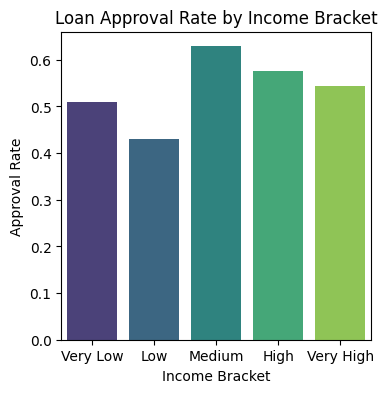

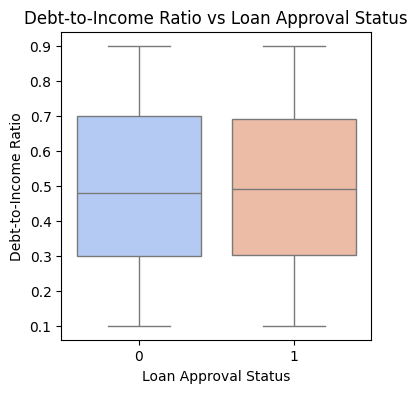

In [22]:

# Visualize the distribution of numerical features or detect outliers using boxplots/histograms
# This is critical for understanding the data and identifying potential preprocessing steps.
# Analyze loan approval rate by credit history

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loan approval rate by Credit History
approval_by_credit_history = df.groupby('Credit History')['Loan Approval Status'].mean()
print("\nLoan Approval Rate by Credit History:")
print(approval_by_credit_history)

# Loan approval rate by income brackets
df['Income Bracket'] = pd.cut(df['Income'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
approval_by_income = df.groupby('Income Bracket', observed=False)['Loan Approval Status'].mean()
print("\nLoan Approval Rate by Income Bracket:")
print(approval_by_income)

# Visualize loan approval rate by income brackets with hue=None and legend=False
plt.figure(figsize=(4, 4))
sns.barplot(x=approval_by_income.index, y=approval_by_income.values, palette='viridis', hue=None, legend=False)
plt.title('Loan Approval Rate by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Approval Rate')
plt.show()

# Analyze the impact of debt-to-income ratio on loan approval
plt.figure(figsize=(4, 4))
sns.boxplot(data=df, x='Loan Approval Status', y='Debt-to-Income Ratio', palette='coolwarm')
plt.title('Debt-to-Income Ratio vs Loan Approval Status')
plt.xlabel('Loan Approval Status')
plt.ylabel('Debt-to-Income Ratio')
plt.show()



In [23]:
# Feature Engineering: Loan-to-Income Ratio and Installment Payment
df['Loan-to-Income Ratio'] = df['Loan Amount'] / df['Income']
df['Installment Payment'] = (df['Loan Amount'] * (df['Interest Rate'] / 100)) / 12

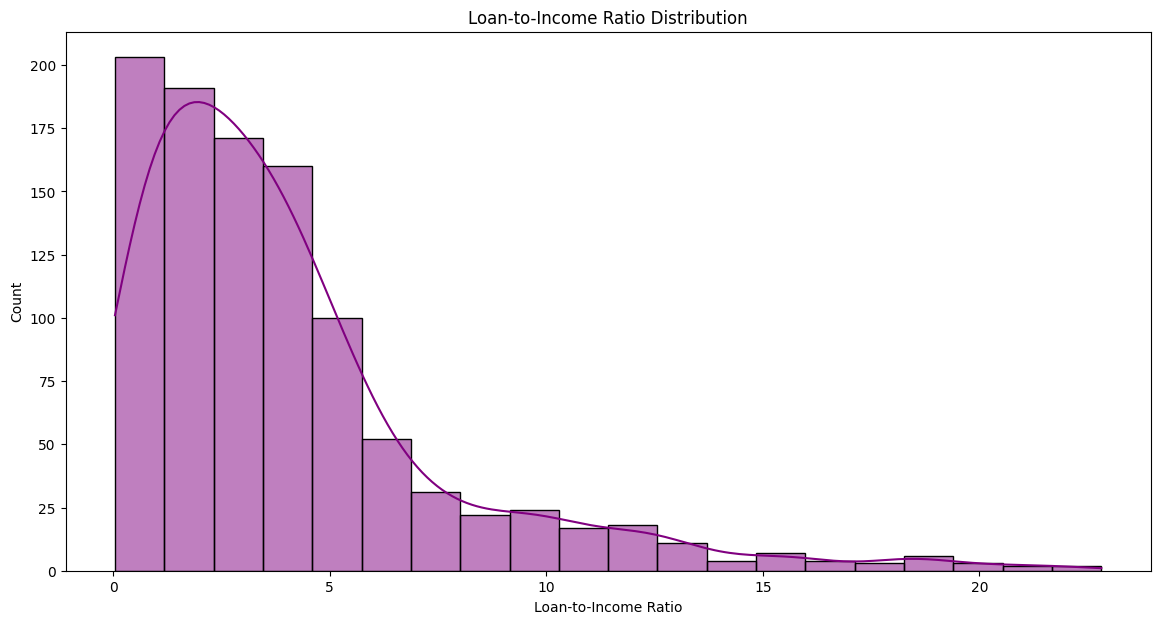

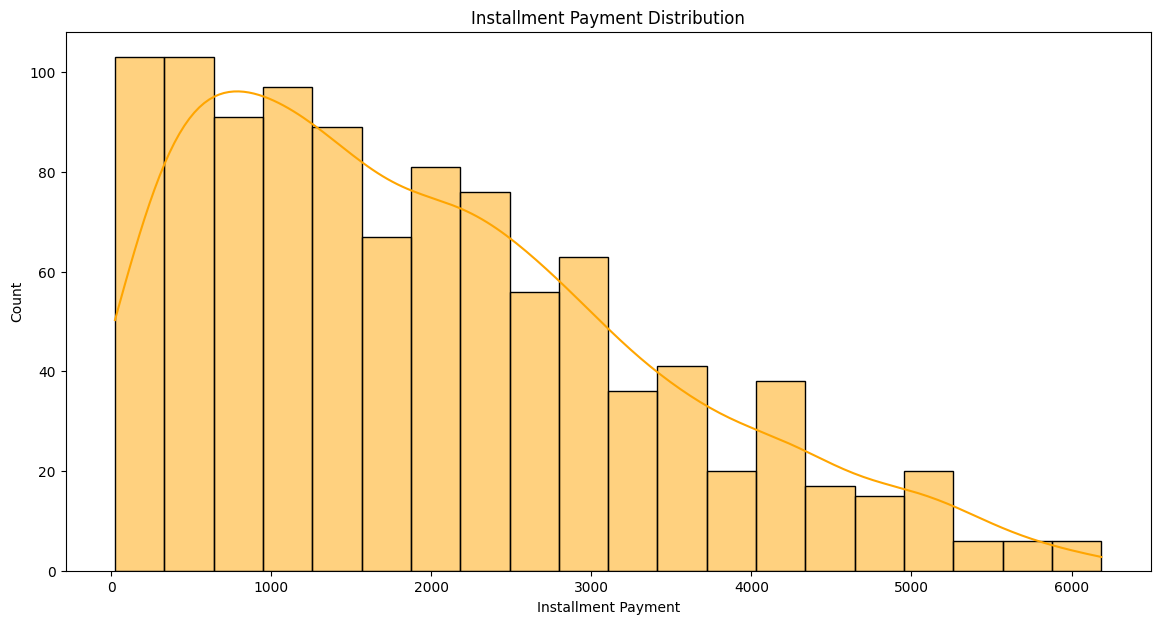

In [24]:
# Visualize the distribution of numerical features or detect outliers using boxplots/histograms
# This is critical for understanding the data and identifying potential preprocessing steps.
# Distribution of engineered features
plt.figure(figsize=(14, 7))
sns.histplot(df['Loan-to-Income Ratio'], kde=True, color='purple', bins=20)
plt.title('Loan-to-Income Ratio Distribution')
plt.show()

plt.figure(figsize=(14, 7))
sns.histplot(df['Installment Payment'], kde=True, color='orange', bins=20)
plt.title('Installment Payment Distribution')
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical(df):
    categorical_columns = ['Gender', 'Employment Type', 'Marital Status', 'Credit History', 'Income Bracket']
    label_encoders = {col: LabelEncoder() for col in categorical_columns}
    for col, le in label_encoders.items():
        df[col] = le.fit_transform(df[col])
    return df, label_encoders


In [26]:
encode_categorical(df)
df

Age  Gender     Income  Employment Type  Marital Status  Loan Amount  \
0     59.0       0   79410.03                2               1    233663.73   
1     49.0       0   98514.52                1               0    495836.26   
2     35.0       0   85297.49                2               1    485521.23   
3     63.0       0   90181.88                1               0    471446.12   
4     28.0       0   83226.47                1               0    393002.12   
...    ...     ...        ...              ...             ...          ...   
1026  53.0       0  124276.97                0               1    126674.68   
1027  58.0       1   33697.78                0               0    204368.38   
1028  33.0       1   24624.21                1               0    447848.18   
1029  51.0       1   86115.31                1               2      5219.18   
1030  56.0       0   70387.38                1               2    451184.63   

      Loan Term  Interest Rate  Credit History  Debt-to-Income Ratio  \
0         259.0          11.11               1                  0.20   
1         258.0           5.12               1                  0.35   
2         166.0          10.07               1                  0.74   
3          45.0           5.63               1                  0.79   
4         140.0           6.70               2                  0.21   
...         ...            ...             ...                   ...   
1026      143.0          11.35               1                  0.64   
1027       50.0           7.31               2                  0.79   
1028       83.0           9.26               1                  0.87   
1029      292.0          10.93               1                  0.60   
1030      344.0           9.37               1                  0.25   

      Credit Score  Loan Approval Status  Income Bracket  \
0            424.0                     1               2   
1            366.0                     0               0   
2            305.0                     1               2   
3            613.0                     1               2   
4            625.0                     0               2   
...            ...                   ...             ...   
1026         483.0                     0               3   
1027         427.0                     1               4   
1028         586.0                     0               4   
1029         552.0                     1               2   
1030         685.0                     1               1   

      Loan-to-Income Ratio  Installment Payment  
0                 2.942496          2163.336700  
1                 5.033129          2115.568043  
2                 5.692093          4074.332322  
3                 5.227726          2211.868046  
4                 4.722081          2194.261837  
...                    ...                  ...  
1026              1.019293          1198.131348  
1027              6.064743          1244.944048  
1028             18.187312          3455.895122  
1029              0.060607            47.538031  
1030              6.410022          3522.999986  

[1031 rows x 15 columns]

In [27]:
# drop income_annum column because its high VIF value
X =df.drop(columns=['Loan Approval Status'])
y=df['Loan Approval Status']

In [28]:
vif_df = pd.DataFrame()
vif_df["Independant Feature"] = X.columns
vif_df

Independant Feature
0                    Age
1                 Gender
2                 Income
3        Employment Type
4         Marital Status
5            Loan Amount
6              Loan Term
7          Interest Rate
8         Credit History
9   Debt-to-Income Ratio
10          Credit Score
11        Income Bracket
12  Loan-to-Income Ratio
13   Installment Payment

In [29]:
# vif_list = []

# for i in range(df1.shape[1]):
#     vif = variance_inflation_factor(df1.to_numpy(),i)
#     vif_list.append(vif)
    
# vif_df["VIF"] = vif_list
# vif_df

In [30]:
# Split the dataset into training and test sets
X = df.drop('Loan Approval Status', axis=1)  # Features (drop target column)
y = df['Loan Approval Status']  # Target variable

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=10)
print(f'Shape of X_train: {xtrain.shape}')
print(f'Shape of X_test: {xtest.shape}')
print(f'Shape of y_train: {ytrain.shape}')
print(f'Shape of y_test: {ytest.shape}')

Shape of X_train: (824, 14)
Shape of X_test: (207, 14)
Shape of y_train: (824,)
Shape of y_test: (207,)


In [31]:
logistic_reg=LogisticRegression()
logistic_reg

LogisticRegression()

In [32]:
xtrain.head()

Age  Gender     Income  Employment Type  Marital Status  Loan Amount  \
34   64.0       0   33552.11                1               0     26649.13   
124  34.0       0   72831.00                2               2    437759.92   
491  37.0       1  147965.68                1               2    270818.71   
781  60.0       0   86972.77                0               1    229703.69   
176  28.0       1   54644.79                1               2    191572.51   

     Loan Term  Interest Rate  Credit History  Debt-to-Income Ratio  \
34       326.0           7.54               2                  0.76   
124       50.0           5.64               1                  0.79   
491      325.0          11.94               2                  0.84   
781      264.0           4.21               1                  0.32   
176      256.0          14.21               0                  0.16   

     Credit Score  Income Bracket  Loan-to-Income Ratio  Installment Payment  
34          570.0               4              0.794261           167.445367  
124         413.0               2              6.010626          2057.471624  
491         383.0               3              1.830281          2694.646164  
781         680.0               2              2.641099           805.877112  
176         429.0               1              3.505778          2268.537806

In [33]:
logistic_reg = LogisticRegression(max_iter=500)  # Increase iterations
logistic_reg_model = logistic_reg.fit(xtrain, ytrain)

C:\Users\UJWAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
ytrain_predict = logistic_reg_model.predict(xtrain)

In [35]:
accuracy = accuracy_score(ytrain,ytrain_predict)
print(f"Accuracy Score = {accuracy}")
print("*"*60)

con_mat = multilabel_confusion_matrix(ytrain,ytrain_predict)
print(f"Confusion Matrix : \n{con_mat}")
print("*"*60)

clss_report = classification_report(ytrain,ytrain_predict)
print(f"Classification report : \n{clss_report}")
print("*"*60)

Accuracy Score = 0.5655339805825242
************************************************************
Confusion Matrix : 
[[[346 102]
  [256 120]]

 [[120 256]
  [102 346]]]
************************************************************
Classification report : 
              precision    recall  f1-score   support

           0       0.54      0.32      0.40       376
           1       0.57      0.77      0.66       448

    accuracy                           0.57       824
   macro avg       0.56      0.55      0.53       824
weighted avg       0.56      0.57      0.54       824

************************************************************


In [36]:
ytest_pred = logistic_reg_model.predict(xtest)
# This uses the trained logistic regression model (logistic_reg_model) to predict the class labels for the test dataset (xtest).

In [37]:
accuracy = accuracy_score(ytest,ytest_pred)
print(f"Accuracy Score = {accuracy}")
print("*"*60)

con_mat = multilabel_confusion_matrix(ytest,ytest_pred)
print(f"Confusion Matrix : \n{con_mat}")
print("*"*60)

clss_report = classification_report(ytest,ytest_pred)
print(f"Classification report : \n{clss_report}")
print("*"*60)

Accuracy Score = 0.45893719806763283
************************************************************
Confusion Matrix : 
[[[77 33]
  [79 18]]

 [[18 79]
  [33 77]]]
************************************************************
Classification report : 
              precision    recall  f1-score   support

           0       0.35      0.19      0.24        97
           1       0.49      0.70      0.58       110

    accuracy                           0.46       207
   macro avg       0.42      0.44      0.41       207
weighted avg       0.43      0.46      0.42       207

************************************************************


In [38]:
import pickle
with open("loan_approval_pred.pkl","wb") as f:
    pickle.dump(logistic_reg_model,f)
with open("loan_approval_pred.pkl","rb") as f:
    model = pickle.load(f)

In [39]:
xtrain.columns

Index(['Age', 'Gender', 'Income', 'Employment Type', 'Marital Status',
       'Loan Amount', 'Loan Term', 'Interest Rate', 'Credit History',
       'Debt-to-Income Ratio', 'Credit Score', 'Income Bracket',
       'Loan-to-Income Ratio', 'Installment Payment'],
      dtype='object')

In [40]:
import pandas as pd

def Prediction(Age, Gender, Income, Employment_Type, Marital_Status, Loan_Amount, 
               Loan_Term, Interest_Rate, Credit_History, Debt_to_Income_Ratio, Credit_Score, 
               Income_Bracket, Loan_to_Income_Ratio, Installment_Payment):
    
    # Creating the test data dictionary with the new columns
    test_data = {
        "Age": [Age],
        "Gender": [Gender],
        "Income": [Income],
        "Employment Type": [Employment_Type],
        "Marital Status": [Marital_Status],
        "Loan Amount": [Loan_Amount],
        "Loan Term": [Loan_Term],
        "Interest Rate": [Interest_Rate],
        "Credit History": [Credit_History],
        "Debt-to-Income Ratio": [Debt_to_Income_Ratio],
        "Credit Score": [Credit_Score],
        "Income Bracket": [Income_Bracket],
        "Loan-to-Income Ratio": [Loan_to_Income_Ratio],
        "Installment Payment": [Installment_Payment]
    }
    
    # Convert the test data to a DataFrame
    test_df = pd.DataFrame(test_data)
    print(test_df)
    
    # Assuming logistic_reg_model is already loaded or trained
    return f"Loan Approval Prediction: {logistic_reg_model.predict(test_df)[0]}"


In [41]:
df.head()

Age  Gender    Income  Employment Type  Marital Status  Loan Amount  \
0  59.0       0  79410.03                2               1    233663.73   
1  49.0       0  98514.52                1               0    495836.26   
2  35.0       0  85297.49                2               1    485521.23   
3  63.0       0  90181.88                1               0    471446.12   
4  28.0       0  83226.47                1               0    393002.12   

   Loan Term  Interest Rate  Credit History  Debt-to-Income Ratio  \
0      259.0          11.11               1                  0.20   
1      258.0           5.12               1                  0.35   
2      166.0          10.07               1                  0.74   
3       45.0           5.63               1                  0.79   
4      140.0           6.70               2                  0.21   

   Credit Score  Loan Approval Status  Income Bracket  Loan-to-Income Ratio  \
0         424.0                     1               2              2.942496   
1         366.0                     0               0              5.033129   
2         305.0                     1               2              5.692093   
3         613.0                     1               2              5.227726   
4         625.0                     0               2              4.722081   

   Installment Payment  
0          2163.336700  
1          2115.568043  
2          4074.332322  
3          2211.868046  
4          2194.261837

In [42]:

Prediction(0,49.0,0,98514.52,1,0,495836.26,258.0,5.12,1,0.35,366.0,5.033129,2115.568043)


   Age  Gender  Income  Employment Type  Marital Status  Loan Amount  \
0    0    49.0       0         98514.52               1            0   

   Loan Term  Interest Rate  Credit History  Debt-to-Income Ratio  \
0  495836.26          258.0            5.12                     1   

   Credit Score  Income Bracket  Loan-to-Income Ratio  Installment Payment  
0          0.35           366.0              5.033129          2115.568043  


'Loan Approval Prediction: 1'